In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

### In Part 4, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

# 1. Import libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(150)

# 2. Load the data

In [99]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [100]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


# 3. Input Features

#### The *Acetylcholinesterase* data set contains 881 input features and 1 output variable (pIC50 values).

### 3.1 INPUT FEATURES : X

In [101]:
x = df.drop(['pIC50'], axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.2 OUTPUT : Y

In [102]:
y = df['pIC50']
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

### 3.3 Check the Shape of X and Y

In [103]:
# Let's check the shape of the data
print("X dimension:", x.shape)
print("y dimension:", y.shape)

X dimension: (4695, 881)
y dimension: (4695,)


### 3.4 Remove low variance features

In [104]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(x)

In [105]:
X.shape

(4695, 137)

# 4. Data split

In [106]:
# 80/20 Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_test.shape)

X train:  (3756, 137)
y train:  (3756,)
X test:  (939, 137)
y train:  (939,)


# 5. Building A Regression Model using Random Forest

In [108]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
r2

0.5738708714796761

In [109]:
# Make prediction on Test subset
Y_pred = model.predict(X_test)

# 6. Scatter Plot of Experimental Vs Predicted pIC50 values

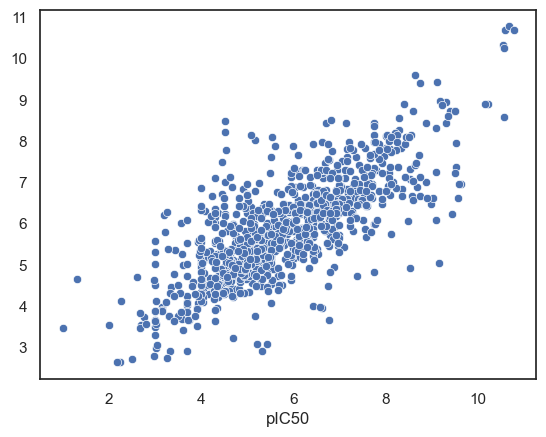

In [110]:
sns.set(color_codes=True)
sns.set_style("white")

sns.scatterplot(x = y_test, y = Y_pred)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

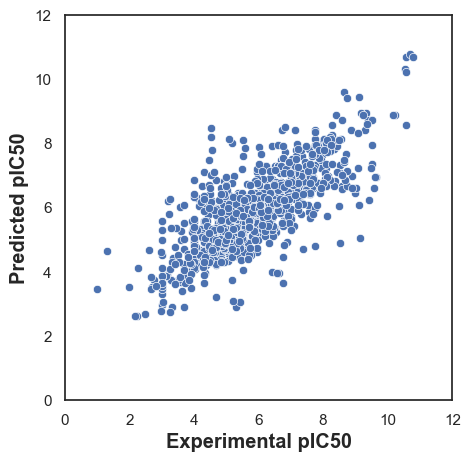

In [111]:
sns.set(color_codes=True)
sns.set_style("white")

#ax = sns.regplot(y_test, Y_pred, scatter_kws={'alpha':0.4})
ax = sns.scatterplot(x=y_test, y=Y_pred)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show